<a href="https://colab.research.google.com/github/laelynette/CPE-313/blob/main/Hands_on_Activity_1_1_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity 2.1 : Neural Networks

**Castillo, Maria Anonette O.**

**CPE32S8**

#### Objective(s):

This activity aims to demonstrate the concepts of neural networks

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to use activation function in neural networks
* Demonstrate how to apply feedforward and backpropagation in neural networks


#### Resources:
* Jupyter Notebook


#### Procedure:

Import the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Define and plot an activation function

### ***Activation function is applied to the output of a neuron which determines whether it should be activated or not based on its input. The purpose of the function is to introduce non-linearity into the network so it can be able to learn complex patterns.***

### Sigmoid function:

$$
\sigma = \frac{1}{1 + e^{-x}}
$$

$\sigma$ ranges from (0, 1). When the input $x$ is negative, $\sigma$ is close to 0. When $x$ is positive, $\sigma$ is close to 1. At $x=0$, $\sigma=0.5$

In [ ]:
## create a sigmoid function
def activation_function(x):
    """Sigmoid function"""
    return 1.0 / (1.0 + np.exp(-x))

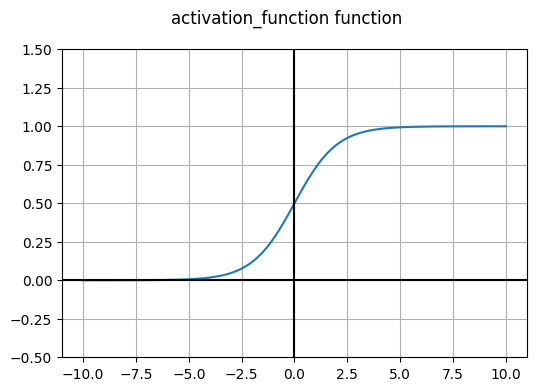

In [ ]:
# Plot the sigmoid function
vals = np.linspace(-10, 10, num=100, dtype=np.float32)
activation = activation_function(vals)
fig = plt.figure(figsize=(6,4))
fig.suptitle('activation_function function')
plt.plot(vals, activation)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.yticks()
plt.ylim([-0.5, 1.5]);

### ***I noticed that the graph is similar to logistic regression which is used for binary classification problems, and the result is also either 0 or 1.***

Choose any activation function and create a method to define that function.

In [ ]:
# ReLU Hidden Layer Activation Function

c

Plot the activation function

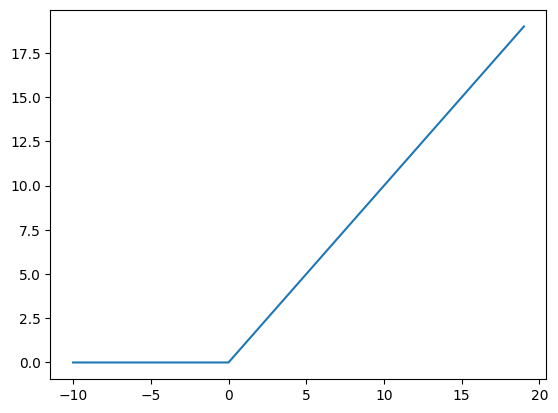

In [ ]:
inputs = [x for x in range(-10, 20)]
outputs = [rectified(x) for x in inputs]
plt.plot(inputs, outputs)
plt.show()

### ***The Rectified Linear Unit (ReLU) outputs x if it is positive. However, if it is negative or 0, the function outputs 0.***

### Neurons as boolean logic gates



### OR Gate

<table>

<tr>
<th colspan="3">OR gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>1</td>
</tr>

</table>

A neuron that uses the sigmoid activation function outputs a value between (0, 1). This naturally leads us to think about boolean values.



By limiting the inputs of $x_1$ and $x_2$ to be in $\left\{0, 1\right\}$, we can simulate the effect of logic gates with our neuron. The goal is to find the weights , such that it returns an output close to 0 or 1 depending on the inputs.

What numbers for the weights would we need to fill in for this gate to output OR logic? Observe from the plot above that $\sigma(z)$ is close to 0 when $z$ is largely negative (around -10 or less), and is close to 1 when $z$ is largely positive (around +10 or greater).

$$
z = w_1 x_1 + w_2 x_2 + b
$$

Let's think this through:

* When $x_1$ and $x_2$ are both 0, the only value affecting $z$ is $b$. Because we want the result for (0, 0) to be close to zero, $b$ should be negative (at least -10)
* If either $x_1$ or $x_2$ is 1, we want the output to be close to 1. That means the weights associated with $x_1$ and $x_2$ should be enough to offset $b$ to the point of causing $z$ to be at least 10.
* Let's give $b$ a value of -10. How big do we need $w_1$ and $w_2$ to be?
    * At least +20
* So let's try out $w_1=20$, $w_2=20$, and $b=-10$!

In [ ]:
def logic_gate(w1, w2, b):
    # Helper to create logic gate functions
    # Plug in values for weight_a, weight_b, and bias
    return lambda x1, x2: activation_function(w1 * x1 + w2 * x2 + b)

def test(gate):
    # Helper function to test out our weight functions.
    for a, b in (0, 0), (0, 1), (1, 0), (1, 1):
        print("{}, {}: {}".format(a, b, np.round(gate(a, b))))

In [ ]:
or_gate = logic_gate(20, 20, -10)
test(or_gate)

0, 0: 0.0
0, 1: 1.0
1, 0: 1.0
1, 1: 1.0


<table>

<tr>
<th colspan="3">OR gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>1</td>
</tr>

</table>

Try finding the appropriate weight values for each truth table.

### AND Gate

<table>

<tr>
<th colspan="3">AND gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>0</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>1</td>
</tr>

</table>


Try to figure out what values for the neurons would make this function as an AND gate.

In [ ]:
# Fill in the w1, w2, and b parameters such that the truth table matches
w1 = 20
w2 = 20
b = -30
and_gate = logic_gate(w1, w2, b)

test(and_gate)

0, 0: 0.0
0, 1: 0.0
1, 0: 0.0
1, 1: 1.0


Do the same for the NOR gate and the NAND gate.

In [ ]:
# NOR GATE

w1 = -20
w2 = -20
b = 10
nor_gate = logic_gate(w1, w2, b)

test(nor_gate)

0, 0: 1.0
0, 1: 0.0
1, 0: 0.0
1, 1: 0.0


In [ ]:
# NAND GATE

w1 = -20
w2 = -20
b = 30
nand_gate = logic_gate(w1, w2, b)

test(nand_gate)

0, 0: 1.0
0, 1: 1.0
1, 0: 1.0
1, 1: 0.0


## Limitation of single neuron

 Here's the truth table for XOR:

### XOR (Exclusive Or) Gate

<table>

<tr>
<th colspan="3">XOR gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>0</td>
</tr>

</table>

Now the question is, can you create a set of weights such that a single neuron can output this property?

It turns out that you cannot. Single neurons can't correlate inputs, so it's just confused. So individual neurons are out. Can we still use neurons to somehow form an XOR gate?


### ***A single neuron cannot handle an XOR gate because unlike AND gate and OR gate, XOR gate has more complex patterns. Example, in AND gate, the output will be 1 if both inputs are 1. However, in XOR, the output is 1 only when the inputs are different. <br> <br> Despite of its complexity, we can still form an XOR gate by combining the outputs of different neurons or gates. Each neuron recognized a specific patterns and by combining them together, they can learn to solve more complex problems.***

In [ ]:
# Make sure you have or_gate, nand_gate, and and_gate working from above!
def xor_gate(a, b):
    c = or_gate(a, b)
    d = nand_gate(a, b)
    return and_gate(c, d)
test(xor_gate)

0, 0: 0.0
0, 1: 1.0
1, 0: 1.0
1, 1: 0.0


## Feedforward Networks

The feed-forward computation of a neural network can be thought of as matrix calculations and activation functions.  We will do some actual computations with matrices to see this in action.

## Exercise
Provided below are the following:

- Three weight matrices `W_1`, `W_2` and `W_3` representing the weights in each layer.  The convention for these matrices is that each $W_{i,j}$ gives the weight from neuron $i$ in the previous (left) layer to neuron $j$ in the next (right) layer.  
- A vector `x_in` representing a single input and a matrix `x_mat_in` representing 7 different inputs.
- Two functions: `soft_max_vec` and `soft_max_mat` which apply the soft_max function to a single vector, and row-wise to a matrix.

The goals for this exercise are:
1. For input `x_in` calculate the inputs and outputs to each layer (assuming sigmoid activations for the middle two layers and soft_max output for the final layer.
2. Write a function that does the entire neural network calculation for a single input
3. Write a function that does the entire neural network calculation for a matrix of inputs, where each row is a single input.
4. Test your functions on `x_in` and `x_mat_in`.

This illustrates what happens in a NN during one single forward pass. Roughly speaking, after this forward pass, it remains to compare the output of the network to the known truth values, compute the gradient of the loss function and adjust the weight matrices `W_1`, `W_2` and `W_3` accordingly, and iterate. Hopefully this process will result in better weight matrices and our loss will be smaller afterwards

In [ ]:
W_1 = np.array([[2,-1,1,4],[-1,2,-3,1],[3,-2,-1,5]])
W_2 = np.array([[3,1,-2,1],[-2,4,1,-4],[-1,-3,2,-5],[3,1,1,1]])
W_3 = np.array([[-1,3,-2],[1,-1,-3],[3,-2,2],[1,2,1]])
x_in = np.array([.5,.8,.2])
x_mat_in = np.array([[.5,.8,.2],[.1,.9,.6],[.2,.2,.3],[.6,.1,.9],[.5,.5,.4],[.9,.1,.9],[.1,.8,.7]])

def soft_max_vec(vec):
    return np.exp(vec)/(np.sum(np.exp(vec)))

def soft_max_mat(mat):
    return np.exp(mat)/(np.sum(np.exp(mat),axis=1).reshape(-1,1))

print('the matrix W_1\n')
print(W_1)
print('-'*30)
print('vector input x_in\n')
print(x_in)
print ('-'*30)
print('matrix input x_mat_in -- starts with the vector `x_in`\n')
print(x_mat_in)

the matrix W_1

[[ 2 -1  1  4]
 [-1  2 -3  1]
 [ 3 -2 -1  5]]
------------------------------
vector input x_in

[0.5 0.8 0.2]
------------------------------
matrix input x_mat_in -- starts with the vector `x_in`

[[0.5 0.8 0.2]
 [0.1 0.9 0.6]
 [0.2 0.2 0.3]
 [0.6 0.1 0.9]
 [0.5 0.5 0.4]
 [0.9 0.1 0.9]
 [0.1 0.8 0.7]]


## Exercise
1. Get the product of array x_in and W_1 (z2)
2. Apply sigmoid function to z2 that results to a2
3. Get the product of a2 and z2 (z3)
4. Apply sigmoid function to z3 that results to a3
5. Get the product of a3 and z3 that results to z4


In [ ]:
#1
z2 = np.dot(x_in, W_1)
z2


array([ 0.8,  0.7, -2.1,  3.8])

In [ ]:
#2
a2 = activation_function(z2)
a2

array([0.68997448, 0.66818777, 0.10909682, 0.97811873])

In [ ]:
#3
z3 = np.dot(a2, W_2)
z3

array([ 3.55880727,  4.01355384,  0.48455118, -1.55014198])

In [ ]:
#4
a3 = activation_function(z3)
a3

array([0.97231549, 0.98225163, 0.61882199, 0.17506576])

In [ ]:
#5
z4 = np.dot(a3, W_3)
z4

array([ 2.04146788,  1.04718238, -3.47867612])

In [ ]:
def soft_max_vec(vec):
    return np.exp(vec)/(np.sum(np.exp(vec)))

def soft_max_mat(mat):
    return np.exp(mat)/(np.sum(np.exp(mat),axis=1).reshape(-1,1))


7. Apply soft_max_vec function to z4 that results to y_out

In [ ]:
y_out = soft_max_vec(z4)
y_out

array([0.72780576, 0.26927918, 0.00291506])

In [ ]:
## A one-line function to do the entire neural net computation

def nn_comp_vec(x):
    return soft_max_vec(activation_function(activation_function(np.dot(x,W_1)).dot(W_2)).dot(W_3))

def nn_comp_mat(x):
    return soft_max_mat(activation_function(activation_function(np.dot(x,W_1)).dot(W_2)).dot(W_3))

In [ ]:
nn_comp_vec(x_in)

array([0.72780576, 0.26927918, 0.00291506])

In [ ]:
nn_comp_mat(x_mat_in)

array([[0.72780576, 0.26927918, 0.00291506],
       [0.62054212, 0.37682531, 0.00263257],
       [0.69267581, 0.30361576, 0.00370844],
       [0.36618794, 0.63016955, 0.00364252],
       [0.57199769, 0.4251982 , 0.00280411],
       [0.38373781, 0.61163804, 0.00462415],
       [0.52510443, 0.4725011 , 0.00239447]])

## Backpropagation
The backpropagation in this part will be used to train a multi-layer perceptron (with a single hidden layer).  Different patterns will be used and the demonstration on how the weights will converge. The different parameters such as learning rate, number of iterations, and number of data points will be demonstrated

In [ ]:
#Preliminaries
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Fill out the code below so that it creates a multi-layer perceptron with a single hidden layer (with 4 nodes) and trains it via back-propagation.  Specifically your code should:

1. Initialize the weights to random values between -1 and 1
1. Perform the feed-forward computation
1. Compute the loss function
1. Calculate the gradients for all the weights via back-propagation
1. Update the weight matrices (using a learning_rate parameter)
1. Execute steps 2-5 for a fixed number of iterations
1. Plot the accuracies and log loss and observe how they change over time


Once your code is running, try it for the different patterns below.

- Which patterns was the neural network able to learn quickly and which took longer?
- What learning rates and numbers of iterations worked well?


### ***Upon implementing different patterns below, the neural network learned the fastest is the thick right angle. It also has the highest accuracy score of approximately 99%. The one that took longer is the diamond pattern with the score of 97.6%. <br><br> The learning rates that worked well is 0.001. Higher learning rate can cause an overshoot while lesser learning rates requires more iterations to reach a higher accuracy. For the iterations, I've noticed that around 3000 iterations already reached a good results.***

###***CIRCLE PATTERN***

shape of x_mat_full is (500, 3)
shape of y is (500,)


<ipython-input-866-d7e273065ee9>:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
<ipython-input-866-d7e273065ee9>:33: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')


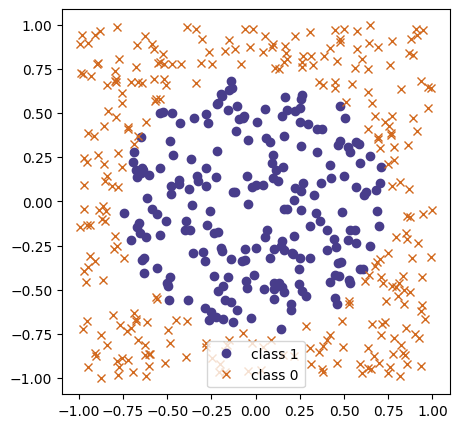

In [ ]:
## This code below generates two x values and a y value according to different patterns
## It also creates a "bias" term (a vector of 1s)
## The goal is then to learn the mapping from x to y using a neural network via back-propagation

num_obs = 500
x_mat_1 = np.random.uniform(-1,1,size = (num_obs,2))
x_mat_bias = np.ones((num_obs,1))
x_mat_full = np.concatenate( (x_mat_1,x_mat_bias), axis=1)

# PICK ONE PATTERN BELOW and comment out the rest.

# # Circle pattern
y = (np.sqrt(x_mat_full[:,0]**2 + x_mat_full[:,1]**2)<.75).astype(int)

# # Diamond Pattern
#y = ((np.abs(x_mat_full[:,0]) + np.abs(x_mat_full[:,1]))<1).astype(int)

# # Centered square
# y = ((np.maximum(np.abs(x_mat_full[:,0]), np.abs(x_mat_full[:,1])))<.5).astype(int)

# # Thick Right Angle pattern
#y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>-.5)).astype(int)

# # Thin right angle pattern
# y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>0)).astype(int)


print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')
ax.legend(loc='best')
ax.axis('equal');

In [ ]:
def activation_function(x):
    return 1.0 / (1.0 + np.exp(-x))


def loss_fn(y_true, y_pred, eps=1e-16):
    """
    Loss function we would like to optimize (minimize)
    We are using Logarithmic Loss
    http://scikit-learn.org/stable/modules/model_evaluation.html#log-loss
    """
    y_pred = np.maximum(y_pred,eps)
    y_pred = np.minimum(y_pred,(1-eps))
    return -(np.sum(y_true * np.log(y_pred)) + np.sum((1-y_true)*np.log(1-y_pred)))/len(y_true)


def forward_pass(W1, W2):
    """
    Does a forward computation of the neural network
    Takes the input `x_mat` (global variable) and produces the output `y_pred`
    Also produces the gradient of the log loss function
    """
    global x_mat
    global y
    global num_
    # First, compute the new predictions `y_pred`
    z_2 = np.dot(x_mat, W_1)
    a_2 = activation_function(z_2)
    z_3 = np.dot(a_2, W_2)
    y_pred = activation_function(z_3).reshape((len(x_mat),))
    # Now compute the gradient
    J_z_3_grad = -y + y_pred
    J_W_2_grad = np.dot(J_z_3_grad, a_2)
    a_2_z_2_grad = activation_function(z_2)*(1-activation_function(z_2))
    J_W_1_grad = (np.dot((J_z_3_grad).reshape(-1,1), W_2.reshape(-1,1).T)*a_2_z_2_grad).T.dot(x_mat).T
    gradient = (J_W_1_grad, J_W_2_grad)

    # return
    return y_pred, gradient


def plot_loss_accuracy(loss_vals, accuracies):
    fig = plt.figure(figsize=(10, 4))
    fig.suptitle('Log Loss and Accuracy over iterations')

    ax = fig.add_subplot(1, 2, 1)
    ax.plot(loss_vals)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Log Loss')

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(accuracies)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Accuracy');

Complete the pseudocode below

iteration 0, log loss is 0.7347, accuracy is 0.576
iteration 200, log loss is 0.6751, accuracy is 0.576
iteration 400, log loss is 0.6612, accuracy is 0.526
iteration 600, log loss is 0.6138, accuracy is 0.642
iteration 800, log loss is 0.5438, accuracy is 0.736
iteration 1000, log loss is 0.5017, accuracy is 0.756
iteration 1200, log loss is 0.4305, accuracy is 0.832
iteration 1400, log loss is 0.3221, accuracy is 0.92
iteration 1600, log loss is 0.2676, accuracy is 0.938
iteration 1800, log loss is 0.2403, accuracy is 0.94
iteration 2000, log loss is 0.2232, accuracy is 0.932
iteration 2200, log loss is 0.2112, accuracy is 0.938
iteration 2400, log loss is 0.2021, accuracy is 0.938
iteration 2600, log loss is 0.1947, accuracy is 0.938
iteration 2800, log loss is 0.1883, accuracy is 0.944
iteration 3000, log loss is 0.1828, accuracy is 0.946
iteration 3200, log loss is 0.1779, accuracy is 0.946
iteration 3400, log loss is 0.1735, accuracy is 0.946
iteration 3600, log loss is 0.1694, a

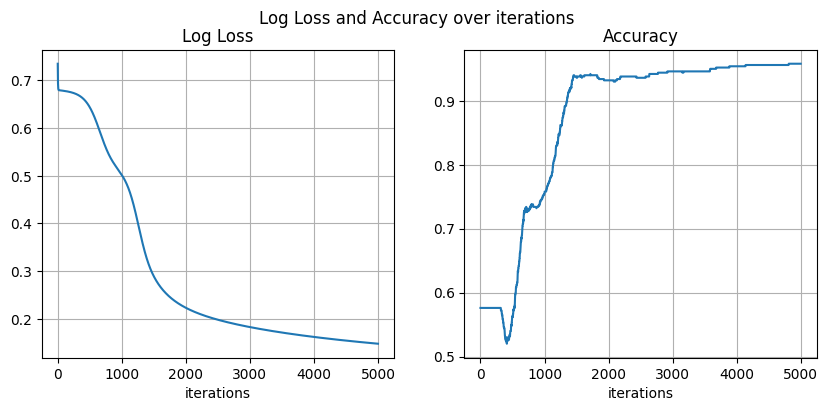

In [ ]:
#### Initialize the network parameters

np.random.seed(1241)

W_1 = np.random.uniform(-1,1,size=(3,4))
W_2 = np.random.uniform(-1,1,size=(4))
num_iter = 5000
learning_rate = .001
x_mat = x_mat_full


loss_vals, accuracies = [], []
for i in range(num_iter):
    ### Do a forward computation, and get the gradient
    y_pred, (J_W_1_grad, J_W_2_grad) = forward_pass(W_1, W_2)

    ## Update the weight matrices
    W_1 = W_1 - learning_rate*J_W_1_grad
    W_2 = W_2 - learning_rate*J_W_2_grad

    ### Compute the loss and accuracy
    curr_loss = loss_fn(y,y_pred)
    loss_vals.append(curr_loss)
    acc = np.sum((y_pred>=.5) == y)/num_obs
    accuracies.append(acc)

    ## Print the loss and accuracy for every 200th iteration
    if((i%200) == 0):
        print('iteration {}, log loss is {:.4f}, accuracy is {}'.format(
            i, curr_loss, acc
        ))
plot_loss_accuracy(loss_vals, accuracies)

Plot the predicted answers, with mistakes in yellow

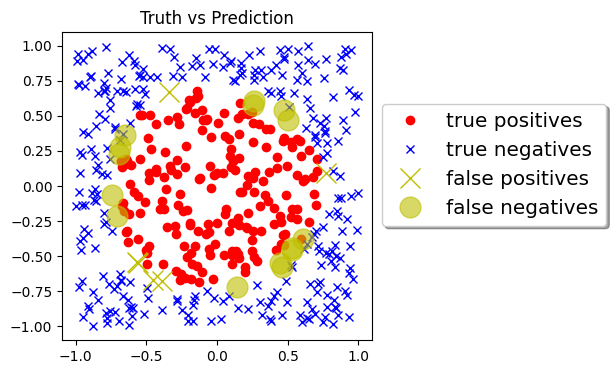

In [ ]:
pred1 = (y_pred>=.5)
pred0 = (y_pred<.5)

fig, ax = plt.subplots(figsize=(4, 4))
# true predictions
ax.plot(x_mat[pred1 & (y==1),0],x_mat[pred1 & (y==1),1], 'ro', label='true positives')
ax.plot(x_mat[pred0 & (y==0),0],x_mat[pred0 & (y==0),1], 'bx', label='true negatives')
# false predictions
ax.plot(x_mat[pred1 & (y==0),0],x_mat[pred1 & (y==0),1], 'yx', label='false positives', markersize=15)
ax.plot(x_mat[pred0 & (y==1),0],x_mat[pred0 & (y==1),1], 'yo', label='false negatives', markersize=15, alpha=.6)
ax.set(title='Truth vs Prediction')
ax.legend(bbox_to_anchor=(1, 0.8), fancybox=True, shadow=True, fontsize='x-large');

### ***In using the circle pattern, the value of loss decreases as the number of iterations increases. From 0.7 it goes down to 0.15. The accuracy is also improving with the final score of 0.96. In addition, the graph above shows that despite of high accuracy, there are still some false positives and false negatives.***

###***DIAMOND PATTERN***

shape of x_mat_full is (500, 3)
shape of y is (500,)
iteration 0, log loss is 0.2701, accuracy is 0.884
iteration 200, log loss is 0.2186, accuracy is 0.902
iteration 400, log loss is 0.2077, accuracy is 0.916
iteration 600, log loss is 0.1960, accuracy is 0.93
iteration 800, log loss is 0.1836, accuracy is 0.938
iteration 1000, log loss is 0.1731, accuracy is 0.958
iteration 1200, log loss is 0.1647, accuracy is 0.962
iteration 1400, log loss is 0.1580, accuracy is 0.964
iteration 1600, log loss is 0.1526, accuracy is 0.968
iteration 1800, log loss is 0.1481, accuracy is 0.972
iteration 2000, log loss is 0.1444, accuracy is 0.97
iteration 2200, log loss is 0.1413, accuracy is 0.972
iteration 2400, log loss is 0.1386, accuracy is 0.972
iteration 2600, log loss is 0.1362, accuracy is 0.974
iteration 2800, log loss is 0.1341, accuracy is 0.978
iteration 3000, log loss is 0.1322, accuracy is 0.98
iteration 3200, log loss is 0.1305, accuracy is 0.98
iteration 3400, log loss is 0.1289, accu

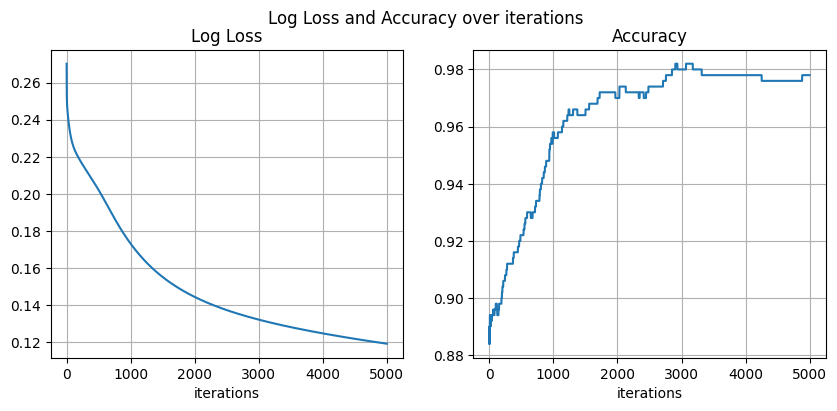

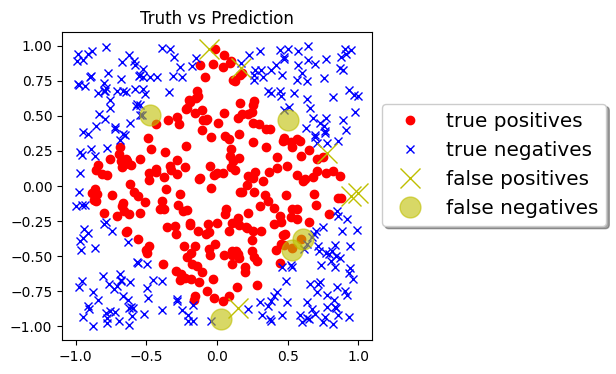

In [ ]:
# Diamond pattern
y = ((np.abs(x_mat_full[:,0]) + np.abs(x_mat_full[:,1]))<1).astype(int)

print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

loss_vals, accuracies = [], []
for i in range(num_iter):
    y_pred, (J_W_1_grad, J_W_2_grad) = forward_pass(W_1, W_2)

    W_1 = W_1 - learning_rate*J_W_1_grad
    W_2 = W_2 - learning_rate*J_W_2_grad

    curr_loss = loss_fn(y,y_pred)
    loss_vals.append(curr_loss)
    acc = np.sum((y_pred>=.5) == y)/num_obs
    accuracies.append(acc)

    if((i%200) == 0):
        print('iteration {}, log loss is {:.4f}, accuracy is {}'.format(
            i, curr_loss, acc
        ))

plot_loss_accuracy(loss_vals, accuracies)

pred1 = (y_pred>=.5)
pred0 = (y_pred<.5)

fig, ax = plt.subplots(figsize=(4, 4))
# true predictions
ax.plot(x_mat[pred1 & (y==1),0],x_mat[pred1 & (y==1),1], 'ro', label='true positives')
ax.plot(x_mat[pred0 & (y==0),0],x_mat[pred0 & (y==0),1], 'bx', label='true negatives')
# false predictions
ax.plot(x_mat[pred1 & (y==0),0],x_mat[pred1 & (y==0),1], 'yx', label='false positives', markersize=15)
ax.plot(x_mat[pred0 & (y==1),0],x_mat[pred0 & (y==1),1], 'yo', label='false negatives', markersize=15, alpha=.6)
ax.set(title='Truth vs Prediction')
ax.legend(bbox_to_anchor=(1, 0.8), fancybox=True, shadow=True, fontsize='x-large');

### ***Compared to initial iteration of circle pattern, the value of loss in diamond pattern is already lower even from the 1st iteration, and as it increases, it eventually reaches a 0.12 loss. The accuracy of this pattern is also higher as it obtained an approximately 98% score.***

###***CENTERED SQUARE PATTERN***

shape of x_mat_full is (500, 3)
shape of y is (500,)
iteration 0, log loss is 0.6764, accuracy is 0.75
iteration 200, log loss is 0.1423, accuracy is 0.942
iteration 400, log loss is 0.1241, accuracy is 0.946
iteration 600, log loss is 0.1100, accuracy is 0.948
iteration 800, log loss is 0.1012, accuracy is 0.954
iteration 1000, log loss is 0.0962, accuracy is 0.962
iteration 1200, log loss is 0.0931, accuracy is 0.966
iteration 1400, log loss is 0.0911, accuracy is 0.968
iteration 1600, log loss is 0.0896, accuracy is 0.968
iteration 1800, log loss is 0.0884, accuracy is 0.97
iteration 2000, log loss is 0.0874, accuracy is 0.97
iteration 2200, log loss is 0.0865, accuracy is 0.97
iteration 2400, log loss is 0.0857, accuracy is 0.972
iteration 2600, log loss is 0.0850, accuracy is 0.972
iteration 2800, log loss is 0.0843, accuracy is 0.972
iteration 3000, log loss is 0.0837, accuracy is 0.972
iteration 3200, log loss is 0.0831, accuracy is 0.972
iteration 3400, log loss is 0.0826, accu

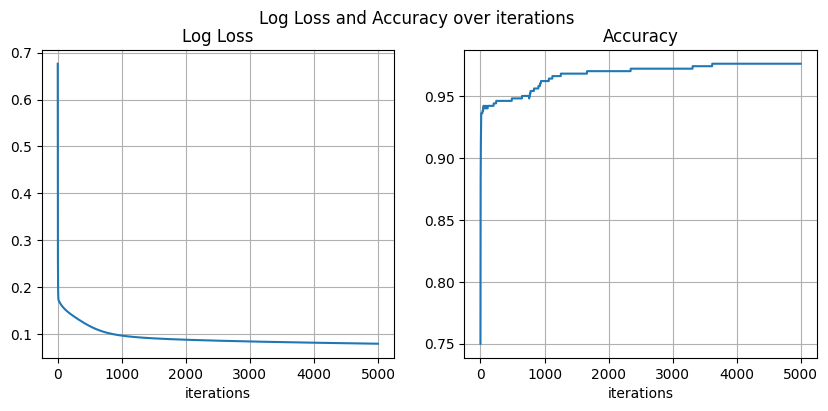

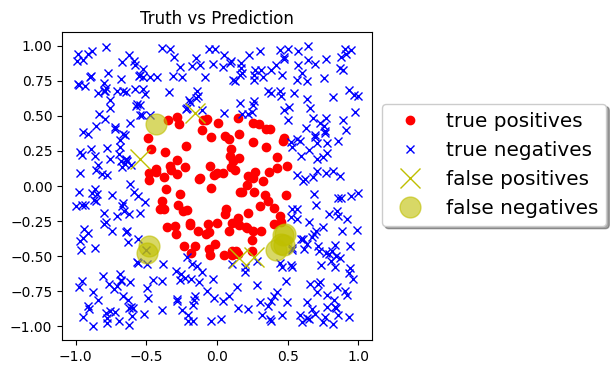

In [ ]:
# Centered Square pattern
y = ((np.maximum(np.abs(x_mat_full[:,0]), np.abs(x_mat_full[:,1])))<.5).astype(int)

print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

loss_vals, accuracies = [], []
for i in range(num_iter):
    y_pred, (J_W_1_grad, J_W_2_grad) = forward_pass(W_1, W_2)

    W_1 = W_1 - learning_rate*J_W_1_grad
    W_2 = W_2 - learning_rate*J_W_2_grad

    curr_loss = loss_fn(y,y_pred)
    loss_vals.append(curr_loss)
    acc = np.sum((y_pred>=.5) == y)/num_obs
    accuracies.append(acc)

    if((i%200) == 0):
        print('iteration {}, log loss is {:.4f}, accuracy is {}'.format(
            i, curr_loss, acc
        ))

plot_loss_accuracy(loss_vals, accuracies)

pred1 = (y_pred>=.5)
pred0 = (y_pred<.5)

fig, ax = plt.subplots(figsize=(4, 4))
# true predictions
ax.plot(x_mat[pred1 & (y==1),0],x_mat[pred1 & (y==1),1], 'ro', label='true positives')
ax.plot(x_mat[pred0 & (y==0),0],x_mat[pred0 & (y==0),1], 'bx', label='true negatives')
# false predictions
ax.plot(x_mat[pred1 & (y==0),0],x_mat[pred1 & (y==0),1], 'yx', label='false positives', markersize=15)
ax.plot(x_mat[pred0 & (y==1),0],x_mat[pred0 & (y==1),1], 'yo', label='false negatives', markersize=15, alpha=.6)
ax.set(title='Truth vs Prediction')
ax.legend(bbox_to_anchor=(1, 0.8), fancybox=True, shadow=True, fontsize='x-large');

### ***Centered Square Pattern's first iteration had an accuracy of 75%. However, as the iteration increases, it obtained a high accuracy score of 97.6% and a loss of 0.07. Moreover, we can still see some wrong predictions based on the graph above.***

###***THICK RIGHT ANGLE PATTERN***

shape of x_mat_full is (500, 3)
shape of y is (500,)
iteration 0, log loss is 1.2084, accuracy is 0.744
iteration 200, log loss is 0.1006, accuracy is 0.958
iteration 400, log loss is 0.0804, accuracy is 0.974
iteration 600, log loss is 0.0727, accuracy is 0.98
iteration 800, log loss is 0.0690, accuracy is 0.982
iteration 1000, log loss is 0.0665, accuracy is 0.982
iteration 1200, log loss is 0.0647, accuracy is 0.978
iteration 1400, log loss is 0.0632, accuracy is 0.978
iteration 1600, log loss is 0.0620, accuracy is 0.978
iteration 1800, log loss is 0.0609, accuracy is 0.978
iteration 2000, log loss is 0.0600, accuracy is 0.978
iteration 2200, log loss is 0.0592, accuracy is 0.98
iteration 2400, log loss is 0.0584, accuracy is 0.98
iteration 2600, log loss is 0.0578, accuracy is 0.982
iteration 2800, log loss is 0.0572, accuracy is 0.982
iteration 3000, log loss is 0.0566, accuracy is 0.982
iteration 3200, log loss is 0.0561, accuracy is 0.982
iteration 3400, log loss is 0.0557, acc

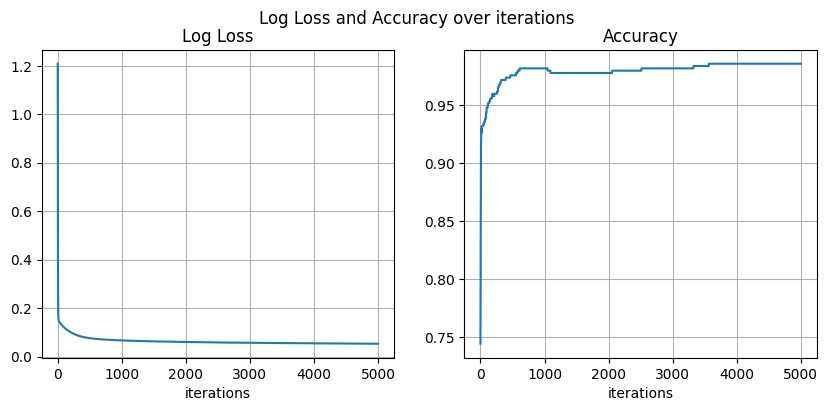

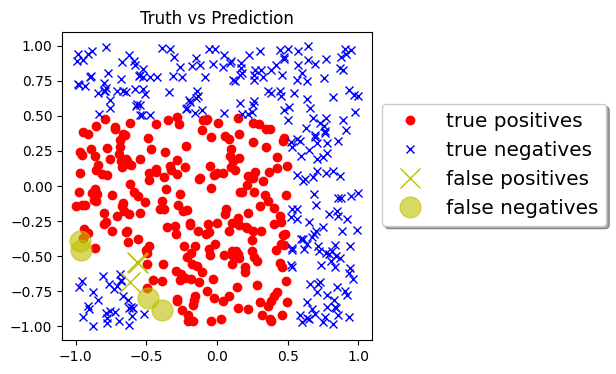

In [ ]:
# Thick Right Angle pattern
y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>-.5)).astype(int)

print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

loss_vals, accuracies = [], []
for i in range(num_iter):
    y_pred, (J_W_1_grad, J_W_2_grad) = forward_pass(W_1, W_2)

    W_1 = W_1 - learning_rate*J_W_1_grad
    W_2 = W_2 - learning_rate*J_W_2_grad

    curr_loss = loss_fn(y,y_pred)
    loss_vals.append(curr_loss)
    acc = np.sum((y_pred>=.5) == y)/num_obs
    accuracies.append(acc)

    if((i%200) == 0):
        print('iteration {}, log loss is {:.4f}, accuracy is {}'.format(
            i, curr_loss, acc
        ))

plot_loss_accuracy(loss_vals, accuracies)

pred1 = (y_pred>=.5)
pred0 = (y_pred<.5)

fig, ax = plt.subplots(figsize=(4, 4))
# true predictions
ax.plot(x_mat[pred1 & (y==1),0],x_mat[pred1 & (y==1),1], 'ro', label='true positives')
ax.plot(x_mat[pred0 & (y==0),0],x_mat[pred0 & (y==0),1], 'bx', label='true negatives')
# false predictions
ax.plot(x_mat[pred1 & (y==0),0],x_mat[pred1 & (y==0),1], 'yx', label='false positives', markersize=15)
ax.plot(x_mat[pred0 & (y==1),0],x_mat[pred0 & (y==1),1], 'yo', label='false negatives', markersize=15, alpha=.6)
ax.set(title='Truth vs Prediction')
ax.legend(bbox_to_anchor=(1, 0.8), fancybox=True, shadow=True, fontsize='x-large');

### ***This Thick Right Angle pattern has the highest accuracy with approximately 99% score among all the patterns that has been implemented. It also has the lowest value of loss which is 0.05. In addition, based on the graph, there's still a few wrong predictions, but most of it are correct.***

###***THIN RIGHT ANGLE PATTERN***

shape of x_mat_full is (500, 3)
shape of y is (500,)
iteration 0, log loss is 1.3758, accuracy is 0.822
iteration 200, log loss is 0.2502, accuracy is 0.894
iteration 400, log loss is 0.2039, accuracy is 0.906
iteration 600, log loss is 0.1944, accuracy is 0.904
iteration 800, log loss is 0.1931, accuracy is 0.904
iteration 1000, log loss is 0.1921, accuracy is 0.904
iteration 1200, log loss is 0.1913, accuracy is 0.906
iteration 1400, log loss is 0.1905, accuracy is 0.906
iteration 1600, log loss is 0.1898, accuracy is 0.906
iteration 1800, log loss is 0.1891, accuracy is 0.908
iteration 2000, log loss is 0.1885, accuracy is 0.908
iteration 2200, log loss is 0.1879, accuracy is 0.91
iteration 2400, log loss is 0.1873, accuracy is 0.91
iteration 2600, log loss is 0.1867, accuracy is 0.91
iteration 2800, log loss is 0.1862, accuracy is 0.912
iteration 3000, log loss is 0.1857, accuracy is 0.912
iteration 3200, log loss is 0.1852, accuracy is 0.912
iteration 3400, log loss is 0.1847, acc

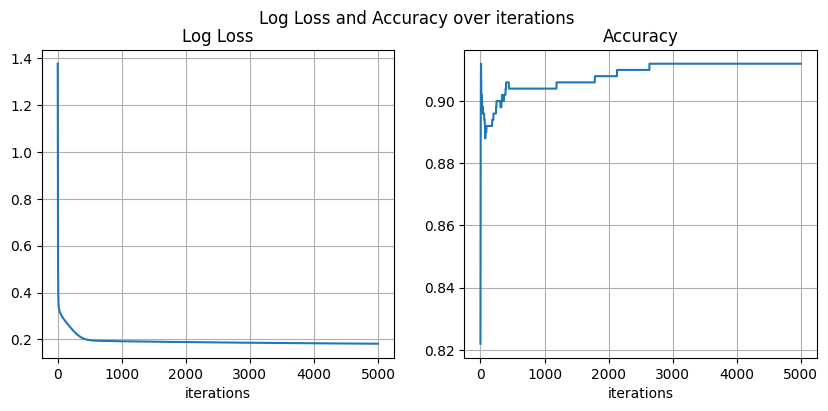

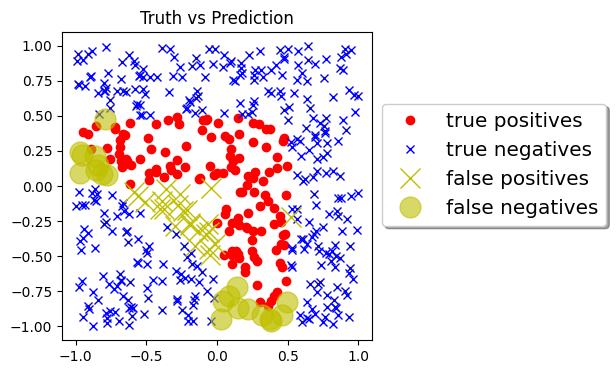

In [ ]:
# Thin Right Angle pattern
y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>0)).astype(int)

print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

loss_vals, accuracies = [], []
for i in range(num_iter):
    y_pred, (J_W_1_grad, J_W_2_grad) = forward_pass(W_1, W_2)

    W_1 = W_1 - learning_rate*J_W_1_grad
    W_2 = W_2 - learning_rate*J_W_2_grad

    curr_loss = loss_fn(y,y_pred)
    loss_vals.append(curr_loss)
    acc = np.sum((y_pred>=.5) == y)/num_obs
    accuracies.append(acc)

    if((i%200) == 0):
        print('iteration {}, log loss is {:.4f}, accuracy is {}'.format(
            i, curr_loss, acc
        ))

plot_loss_accuracy(loss_vals, accuracies)

pred1 = (y_pred>=.5)
pred0 = (y_pred<.5)

fig, ax = plt.subplots(figsize=(4, 4))
# true predictions
ax.plot(x_mat[pred1 & (y==1),0],x_mat[pred1 & (y==1),1], 'ro', label='true positives')
ax.plot(x_mat[pred0 & (y==0),0],x_mat[pred0 & (y==0),1], 'bx', label='true negatives')
# false predictions
ax.plot(x_mat[pred1 & (y==0),0],x_mat[pred1 & (y==0),1], 'yx', label='false positives', markersize=15)
ax.plot(x_mat[pred0 & (y==1),0],x_mat[pred0 & (y==1),1], 'yo', label='false negatives', markersize=15, alpha=.6)
ax.set(title='Truth vs Prediction')
ax.legend(bbox_to_anchor=(1, 0.8), fancybox=True, shadow=True, fontsize='x-large');

### ***Thin Right Angle pattern has the lowest accuracy score of 91%. The value of loss is decreasing as the number of iterations increases, but the rate of decrease slows down as it reaches 2000 iterations.***

#### Supplementary Activity

1. Use a different weights , input and activation function
2. Apply feedforward and backpropagation
3. Plot the loss and accuracy for every 300th iteration


iteration 0, log loss is 1.6947, accuracy is 0.954
iteration 300, log loss is 0.1859, accuracy is 0.954
iteration 600, log loss is 0.1708, accuracy is 0.954
iteration 900, log loss is 0.1479, accuracy is 0.954
iteration 1200, log loss is 0.1259, accuracy is 0.954
iteration 1500, log loss is 0.1042, accuracy is 0.954
iteration 1800, log loss is 0.0855, accuracy is 0.954
iteration 2100, log loss is 0.0692, accuracy is 0.962
iteration 2400, log loss is 0.0558, accuracy is 0.984


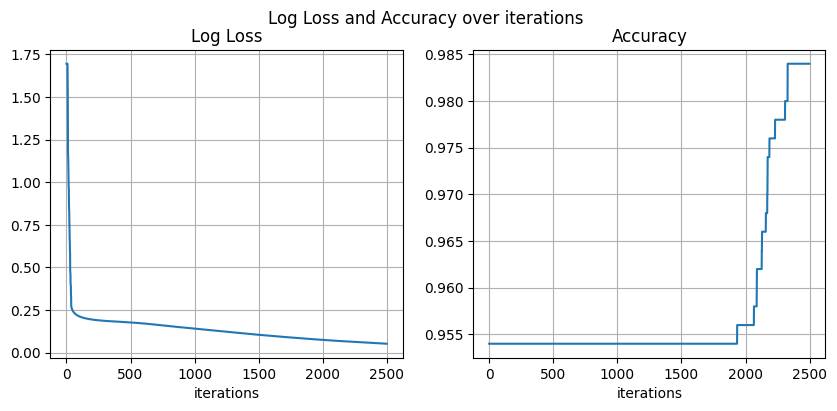

In [ ]:
num_obs = 500  # Number of observations
x_mat_1 = np.random.uniform(-2, 2, size=(num_obs, 2))  # Range of the random values
x_mat_bias = np.ones((num_obs, 1))
x_mat_full = np.concatenate((x_mat_1, x_mat_bias), axis=1) #adding bias column to the data

# Centered Square Pattern
y = ((np.maximum(np.abs(x_mat_full[:,0]), np.abs(x_mat_full[:,1])))<.5).astype(int)


def activation_function(x): # Changimg the activation function to RELU function
    """
    RELU function
    """
    return np.maximum(0, x)

#### Initialize the network parameters

np.random.seed(1241)

W_1 = np.random.uniform(-.1,.1,size=(3,4)) #changing the weights
W_2 = np.random.uniform(-.1,.1,size=(4))
num_iter = 2500
learning_rate = .001 #adjusting learning rates
x_mat = x_mat_full

loss_vals, accuracies = [], []
for i in range(num_iter):
    y_pred, (J_W_1_grad, J_W_2_grad) = forward_pass(W_1, W_2)

    W_1 = W_1 - learning_rate*J_W_1_grad
    W_2 = W_2 - learning_rate*J_W_2_grad

    curr_loss = loss_fn(y,y_pred)
    loss_vals.append(curr_loss)
    acc = np.sum((y_pred>=.5) == y)/num_obs
    accuracies.append(acc)

    if((i%300) == 0):
        print('iteration {}, log loss is {:.4f}, accuracy is {}'.format(
            i, curr_loss, acc
        ))
plot_loss_accuracy(loss_vals, accuracies)

### ***For this activity, I used a different activation function which is the ReLU. I applied the feedforward by passing the x_mat_full through the neural network (centered square pattern). For backpropagation, the gradients of loss is calculated with resepect to the weights, and weight is updated for minimizing the loss. Moreover, the graph above shows that the accuracy reaches a score of 98% with a total of 2400 iterations.***

#### Conclusion

### ***To sum up, activation function is used in neural network so it can be able to learn complex patterns in data. In this activity, I tried to implement the sigmoid and ReLU function. In addition, I learned the feedforward and backpropagation. Feedforward is passing the input through neural network. I was able to use different patterns and compare them with each other. In my case, thick right angle pattern obtained the highest accuracy score and the one that learned the fastest. The hyperparameters like learning rate and number of iterations can also affect the result of accuracy score. Meanwhile, with backpropagation, we can update the neural network's weights based on the difference between the predicted and actual output.***

PDF LINK: https://colab.research.google.com/drive/1BkrYCrcweuROKtX3x-1PEFQxRsWBNhlP?usp=sharing